## **Data Analysis Python Project- GoPuff Analysis**

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Data**

In [2]:
df = pd.read_csv("C:/Users/Acer/OneDrive/Desktop/SQL/shopify project/Python gopuff/gopuff_data.csv")

### **Sample Data**

In [3]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [4]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### **Size Of Data**

In [5]:
print("Size of Data:" ,df.shape)

Size of Data: (8523, 12)


### **Field Information**

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Data Types**

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **Data Cleaning**

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [9]:
df['Item Fat Content'] =df ['Item Fat Content'].replace({'LF': 'Low Fat', 
                                                         'low fat': 'Low Fat',
                                                         'reg': 'Regular'
                                                        })

In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## **Business Requirements**

### **KPI's Requirements**

In [11]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# Number of Items Sold (no Quantity column, so fallback = count of rows)
no_of_items_sold = df['Sales'].count()

# Average Rating (column name is 'Rating', not 'Ratings')
avg_ratings = df['Rating'].mean()

# Display
print(f"Total sales: ${total_sales:,.0f}")
print(f"Average sales: ${avg_sales:,.0f}")
print(f"Number of items sold: {no_of_items_sold:,.0f}")
print(f"Average rating: {avg_ratings:.2f}")

Total sales: $1,201,681
Average sales: $141
Number of items sold: 8,523
Average rating: 3.97


### **Chart Contents**

#### **Total Sales by Fat Content**

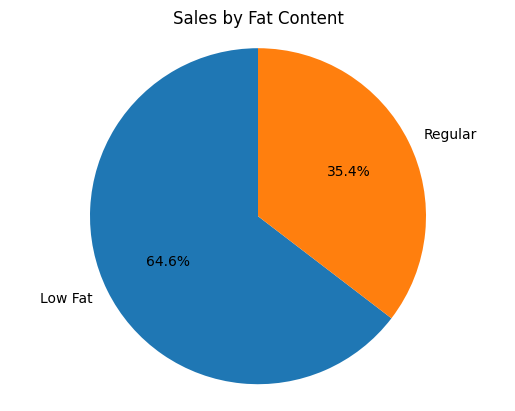

In [12]:
import matplotlib.pyplot as plt

sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(
    sales_by_fat,
    labels=sales_by_fat.index,
    autopct='%.1f%%',
    startangle=90
)
plt.title('Sales by Fat Content')
plt.axis('equal')  # Ensures pie chart is a circle
plt.show()

#### **Total Sales by Item Type**

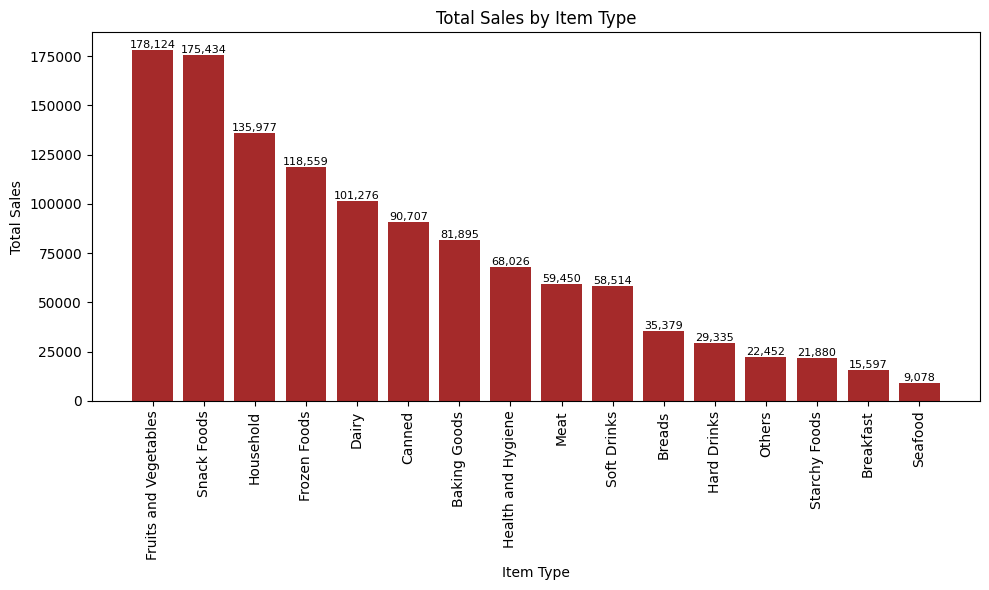

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Group and sort sales by item type
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(10, 6))

# Create bar chart
bars = plt.bar(sales_by_type.index, sales_by_type.values, color='brown')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
# Add value labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

#### **Fat Content by Outlet for Total Sales**

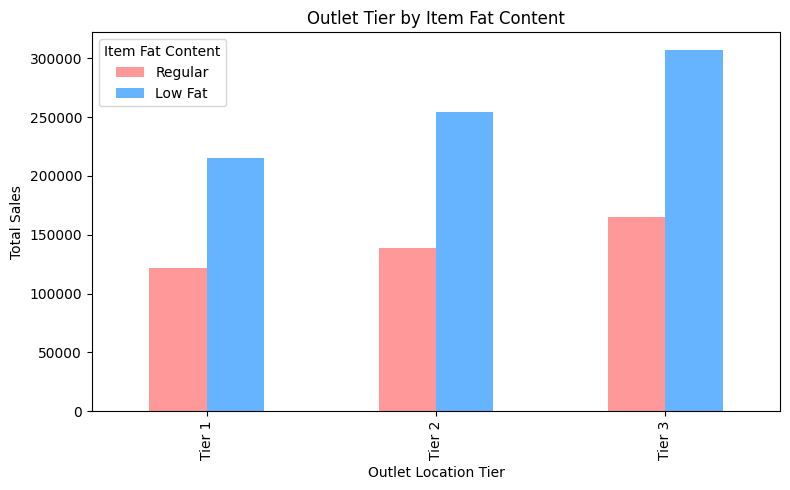

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Group and reshape the data
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

# Filter only 'Regular' and 'Low Fat' categories
grouped = grouped[['Regular', 'Low Fat']]

# Plot the grouped bar chart
ax = grouped.plot(
    kind='bar',
    figsize=(8, 5),
    title='Outlet Tier by Item Fat Content',
    color=['#FF9999', '#66B3FF']  # Optional: custom colors
)

# Axis labels and legend
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')

# Layout adjustment
plt.tight_layout()
plt.show()

#### **Total Sales By Outlet Establishmant**

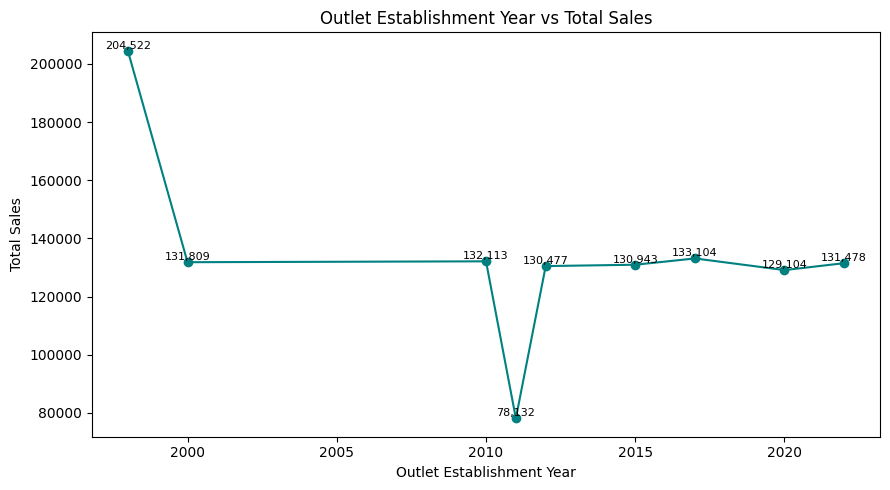

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Line chart: Total Sales by Outlet Establishment Year
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='teal')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment Year vs Total Sales')

# Add value labels
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()


#### **Sales by Outlet Size**

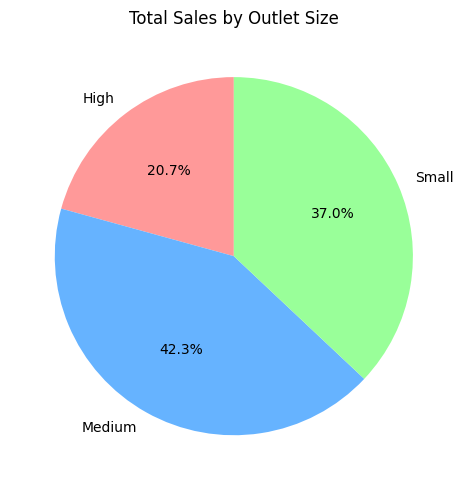

In [16]:
# Pie chart: Total Sales by Outlet Size
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(5, 5))
plt.pie(
    sales_by_size,
    labels=sales_by_size.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FF9999', '#66B3FF', '#99FF99']  # Optional: custom colors
)
plt.title('Total Sales by Outlet Size')
plt.tight_layout()
plt.show()

#### **Sales by Outlet Location**

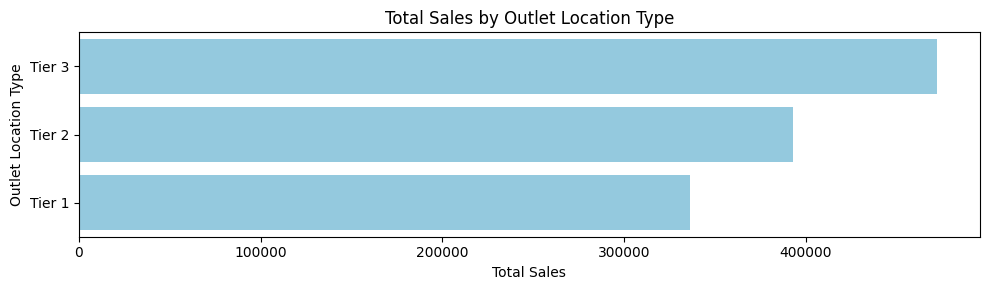

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sort sales by outlet location type
sales_by_location = (
    df.groupby('Outlet Location Type')['Sales']
      .sum()
      .reset_index()
      .sort_values('Sales', ascending=False)
)

# Set figure size
plt.figure(figsize=(10, 3))  # Wide layout, compact height

# Create horizontal bar chart (using color instead of palette to avoid warning)
ax = sns.barplot(
    x='Sales',
    y='Outlet Location Type',
    data=sales_by_location,
    color='skyblue'  # Single color for all bars
)

# Add titles and labels
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

In [18]:
df.shape

(8523, 12)

In [19]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [22]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [23]:
df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())

In [24]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [25]:
df.tail(25)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8498,Regular,FDG46,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.032750,12.857645,112.1518,4.0
8499,Regular,FDJ21,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.038342,12.857645,146.2102,4.0
8500,Regular,FDK58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.044765,12.857645,102.4016,4.0
8501,Regular,FDN34,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.045543,12.857645,170.7132,4.0
8502,Regular,FDP21,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.025616,12.857645,188.1872,4.0
8503,Regular,FDR22,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.018473,12.857645,109.9544,4.0
8504,Regular,FDS09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.080696,12.857645,51.3008,4.0
8505,Regular,FDS34,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.076387,12.857645,112.1518,4.0
8506,Regular,FDU09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.066275,12.857645,54.1956,4.0
8507,Regular,FDU33,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.134057,12.857645,45.3402,4.0


In [26]:
!pip install sqlalchemy pyodbc pandas
import pandas as pd
from sqlalchemy import create_engine
server = 'your_server_name'  # e.g., 'DESKTOP-AIFF1C6\SQLEXPRESS'
database = 'GopuffDB'
username = 'your_username'
password = 'your_password'

connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
df = pd.read_sql_query('SELECT * FROM YourTableName', engine)

Defaulting to user installation because normal site-packages is not writeable


OperationalError: (pyodbc.OperationalError) ('08001', '[08001] [Microsoft][ODBC Driver 17 for SQL Server]Named Pipes Provider: Could not open a connection to SQL Server [53].  (53) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 17 for SQL Server]Login timeout expired (0); [08001] [Microsoft][ODBC Driver 17 for SQL Server]A network-related or instance-specific error has occurred while establishing a connection to SQL Server. Server is not found or not accessible. Check if instance name is correct and if SQL Server is configured to allow remote connections. For more information see SQL Server Books Online. (53)')
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
!pip install sqlalchemy pyodbc pandas

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

In [ ]:
server = r'DESKTOP-AIFF1C6\SQLEXPRESS'  # Use raw string or double backslash
database = 'GopuffDB'

connection_string = f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

server = r'DESKTOP-AIFF1C6\SQLEXPRESS'  # Use raw string or double backslash
database = 'GopuffDB'

connection_string = f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'

engine = create_engine(connection_string)

df = pd.read_sql_query('SELECT * FROM gopuff_data', engine)

print(df.head())

In [ ]:
df.rename(columns={'Item_Fat_Content': 'Item_Fat_Content1'}, inplace=True)

In [ ]:
print(df.head(15))

In [ ]:
df_transposed = df.T
print(df_transposed)

In [ ]:
single_row = df.iloc[0]  # first row as a Series
print(single_row)

In [ ]:
import pandas as pd
single_row_df = pd.DataFrame([df.columns.tolist(), df.iloc[0].tolist()])
print(single_row_df)

In [ ]:
single_row_str = ', '.join(df.iloc[0].astype(str))
print(single_row_str)

In [ ]:
single_row_str = ', '.join(df.iloc[0].astype(str))
print(single_row_str)

In [ ]:
# Create the string from the first row
single_row_str = ', '.join(df.iloc[0].astype(str))

# Print or use the string later
print(single_row_str)

# You can also save it to a text file
with open('single_row.txt', 'w') as f:
    f.write(single_row_str)

In [ ]:
import json
 
# JSON Data
data = {
	"name": "Aman",
	"age": 25,
	"department": "Analytics",
	"skills": ["Python", "SQL", "Tableau"]
}
 
# Writing JSON to file
with open("data.json", "w") as json_file:
	json.dump(data, json_file)
 
# Reading JSON from file
with open("data.json", "r") as json_file:
	loaded_data = json.load(json_file)
	print(loaded_data)
	print("Employee Name:", loaded_data["name"])
